In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from json import load
import tifffile
from tqdm import tqdm
from skimage.draw import polygon
from matplotlib import rcParams
from glasbey import create_palette

palette = {
    "green": "#558150",
    "beige": "#F1E2C3",
    "brown": "#A7785A",
    "pink": "#F0D6C2",
    "black": "#0E0E0E",
}

rcParams['font.family'] = 'sans-serif'
rcParams['figure.facecolor'] = "#FFFFFF00"
rcParams['axes.facecolor'] = "#FFFFFF00"
rcParams['legend.framealpha'] = 0.2
rcParams['axes.edgecolor'] = palette["black"]
rcParams['axes.labelcolor'] = palette["black"]
rcParams['xtick.color'] = palette["black"]
rcParams['ytick.color'] = palette["black"]
rcParams['text.color'] = palette["black"]
rcParams['axes.titlecolor'] = palette["black"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
base_path = Path(r"D:\Tracking\NucleiTracking\data\interim\lightsheet\2025_02_06\recon\test3")
raw = tifffile.imread(list(base_path.glob("*.tif"))[1])

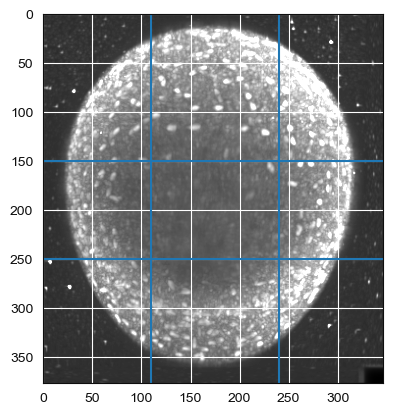

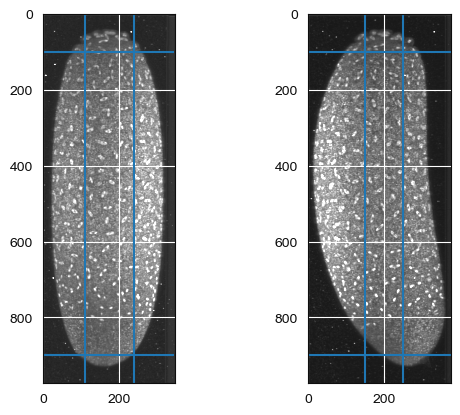

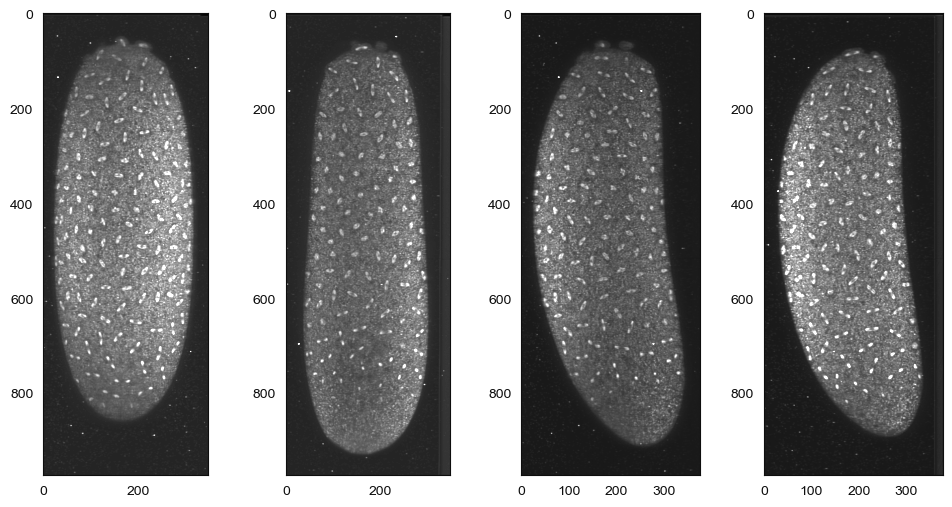

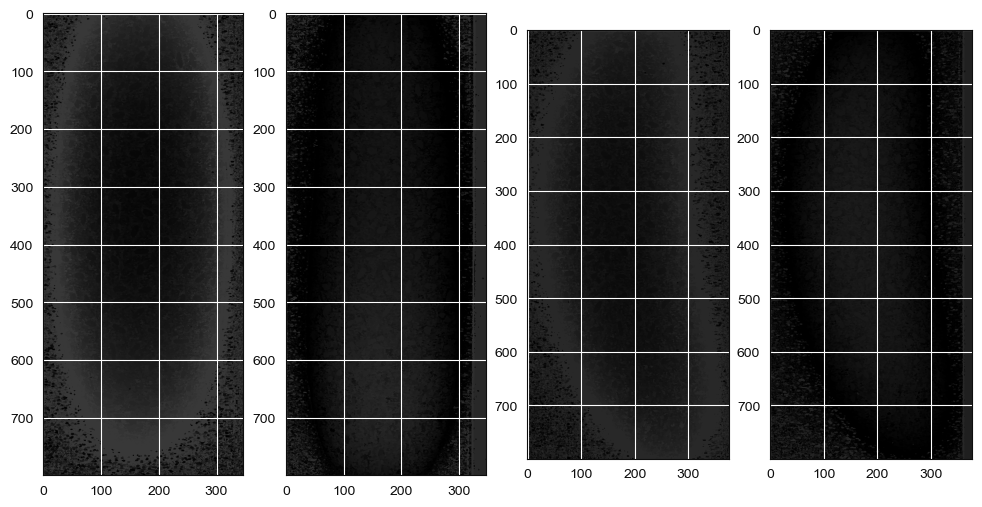

In [8]:
top = 100
bot = 900
left = 110
right = 240
back = 150
front = 250

# [110 240 100 900 150 250]

plt.imshow(np.max(raw[:, top:bot], axis=1), "gray", vmax=np.quantile(raw, 0.9999))
plt.vlines([left, right], 0, raw.shape[0]-1)
plt.hlines([front, back], 0, raw.shape[2]-1)
plt.show()
fig, axes = plt.subplots(1, 2)
axes[0].imshow(np.max(raw, axis=0), "gray", vmax=np.quantile(raw, 0.9999))
axes[0].vlines([left, right], 0, raw.shape[1]-1)
axes[0].hlines([top, bot], 0, raw.shape[2]-1)
axes[1].imshow(np.max(raw, axis=2).T, "gray", vmax=np.quantile(raw, 0.9999))
axes[1].vlines([front, back], 0, raw.shape[1]-1)
axes[1].hlines([top, bot], 0, raw.shape[0]-1)
plt.show()
fig, axes = plt.subplots(1, 4, figsize=(12, 6))
axes[0].imshow(np.max(raw[:back, :], axis=0), "gray", vmax=np.quantile(raw, 0.9999))
axes[1].imshow(np.max(raw[front:, :], axis=0), "gray", vmax=np.quantile(raw, 0.9999))
axes[2].imshow(np.max(raw[:, :, :left], axis=2).T, "gray", vmax=np.quantile(raw, 0.9999))
axes[3].imshow(np.max(raw[:, :, right:], axis=2).T, "gray", vmax=np.quantile(raw, 0.9999))
for ax in axes:
    ax.grid(False)
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(12, 6))
axes[0].imshow(np.argmax(raw[:back, top:bot], axis=0), "gray", vmax=np.quantile(raw, 0.9999))
axes[1].imshow(np.argmax(raw[front:, top:bot], axis=0), "gray", vmax=np.quantile(raw, 0.9999))
axes[2].imshow(np.argmax(raw[:, top:bot, :left], axis=2).T, "gray", vmax=np.quantile(raw, 0.9999))
axes[3].imshow(np.argmax(raw[:, top:bot, right:], axis=2).T, "gray", vmax=np.quantile(raw, 0.9999))
plt.show()

In [4]:
test = np.zeros(raw.shape)


z = np.argmax(raw[:back, top:bot], axis=0)
yy, xx = np.meshgrid(top + np.arange(z.shape[0]), np.arange(z.shape[1]), indexing="ij")
test[z.flatten(), yy.flatten(), xx.flatten()] += 1

z = np.argmax(raw[front:, top:bot], axis=0) + front
yy, xx = np.meshgrid(top + np.arange(z.shape[0]), np.arange(z.shape[1]), indexing="ij")
test[z.flatten(), yy.flatten(), xx.flatten()] += 2

x = np.argmax(raw[:, top:bot, :left], axis=2)
zz, yy = np.meshgrid(np.arange(x.shape[0]), top + np.arange(x.shape[1]), indexing="ij")
test[zz.flatten(), yy.flatten(), x.flatten()] += 4

x = np.argmax(raw[:, top:bot, right:], axis=2) + right
zz, yy = np.meshgrid(np.arange(x.shape[0]), top + np.arange(x.shape[1]), indexing="ij")
test[zz.flatten(), yy.flatten(), x.flatten()] += 8

# plt.imshow(np.argmax(test, axis=0))
# plt.show()
# plt.imshow(z)
# plt.show()

import napari

viewer = napari.Viewer()
viewer.add_image(test)
viewer.add_image(raw)
napari.run()

# axes[0].imshow(np.argmax(raw[:back, top:bot], axis=0), "gray", vmax=np.quantile(raw, 0.9999))
# axes[1].imshow(np.argmax(raw[front:, top:bot], axis=0), "gray", vmax=np.quantile(raw, 0.9999))
# axes[2].imshow(np.argmax(raw[:, top:bot, :left], axis=2).T, "gray", vmax=np.quantile(raw, 0.9999))
# axes[3].imshow(np.argmax(raw[:, top:bot, right:], axis=2).T, "gray", vmax=np.quantile(raw, 0.9999))

In [5]:
from scipy.ndimage import rotate

rotated = rotate(raw, 45, (0, 2))

(512, 974, 512)


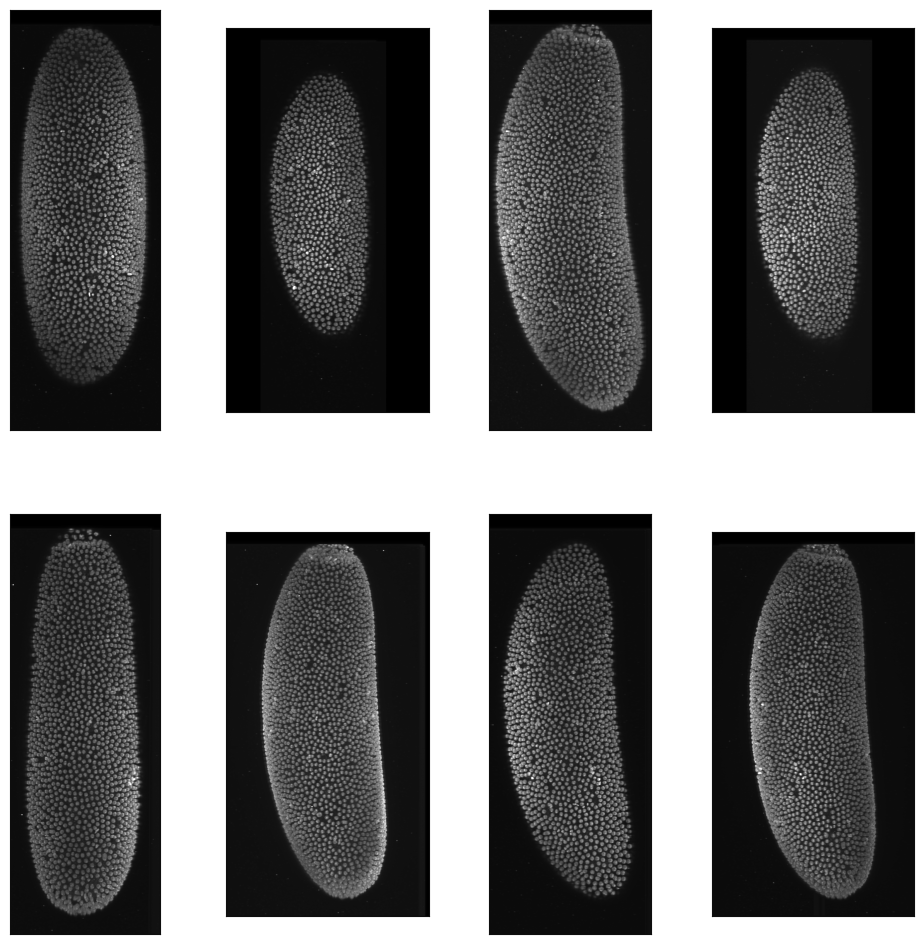

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(12, 12))
axes = axes.flatten()

print(rotated.shape)

def imshow(ax, data):
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(data, "gray", vmax=np.quantile(data, 0.9999))

imshow(axes[0], np.max(raw[:160], axis=0)) 
imshow(axes[1], np.max(rotated[:160], axis=0)) 
imshow(axes[2], np.max(raw[:, :, :160], axis=2).T) 
imshow(axes[3], np.max(rotated[:, :, :160], axis=2).T) 
imshow(axes[4], np.max(raw[240:], axis=0)) 
imshow(axes[5], np.max(rotated[240:], axis=0)) 
imshow(axes[6], np.max(raw[:, :, 240:], axis=2).T) 
imshow(axes[7], np.max(rotated[:, :, 240:], axis=2).T) 

plt.show()

# plt.imshow(np.max(rotated, axis=0), "gray", vmax=np.quantile(raw, 0.9999))

In [ ]:
from skimage.measure import regionprops
from scipy.spatial.distance import cdist


def merge_frame(centroids_a, centroids_b, max_distance):
    
    centroids_a = np.array(centroids_a)
    centroids_b = np.array(centroids_b)
    
    dm = cdist(centroids_a, centroids_b)
    
    second_dis = np.min(np.partition(dm, 2, 0)[1, :])
    # print(second_dis)
    
    mergers_a = np.argwhere(np.min(dm, axis=1) < max_distance)[:, 0]
    mergers_b = np.argmin(dm, axis=1)[mergers_a]
    
    # print(mergers_a)
    # print(mergers_b)
    
    # # max_distance = min(max_distance, second_dis)
    # 
    # mergers = np.argwhere(dm < max_distance)
    # mergers_a = mergers[:, 0]
    # mergers_b = mergers[:, 1]
    
    fair = np.ones(len(centroids_a), dtype=bool)
    fair[mergers_a] = 0
    
    centroids_out = []
    centroids_out.extend(centroids_a[fair])
    
    fair = np.ones(len(centroids_b), dtype=bool)
    fair[mergers_b] = 0
    centroids_out.extend(centroids_b[fair])
    
    merged = (centroids_a[mergers_a] + centroids_b[mergers_b]) / 2
    centroids_out.extend(merged)
    
    return centroids_out
    



base = Path(r"D:\Tracking\NucleiTracking\data\interim\lightsheet\2025_02_06\recon\box_project\cellpose_out")

max_dis = 10
centroids = []

for i in range(6):

    locs = tifffile.imread(base / f"all_locs_{i}.tif")
    masks = tifffile.imread(base / f"all_vals_{i}_cp_masks.tif")
    vals = tifffile.imread(base / f"all_vals_{i}.tif")

    axis = i // 2

    for t, (maskslice, locslice) in tqdm(enumerate(zip(masks, locs))): 
        
        frame_centroids = []
        
        props = regionprops(maskslice, locslice)

        for prop in props:
            ct = [prop.centroid[0], prop.centroid[1]]
            round_ct = [int(np.round(c)) for c in prop.centroid_local]
            
            z = np.median(prop.image_intensity[round_ct[0] - 1:round_ct[0] + 2, round_ct[1] - 1:round_ct[1] + 2])

            ct = [prop.centroid[0], prop.centroid[1]]
            ct.insert(axis, z)

            frame_centroids.append([t, *ct])
        
        if i == 0:
            centroids.append(frame_centroids)
            
        else:
            centroids[t] = merge_frame(centroids[t], frame_centroids, max_dis)
            

centroids_all = []
for f in centroids:
    centroids_all.extend(f)
            
centroids = np.array(centroids_all)

viewer = napari.Viewer()
pts = viewer.add_points(centroids, shading="spherical")

napari.run()

269it [00:36,  7.41it/s]
269it [00:50,  5.38it/s]
269it [00:09, 29.58it/s]
269it [00:03, 88.36it/s] 
269it [01:05,  4.12it/s]
269it [00:41,  6.46it/s]


In [4]:
import napari
viewer = napari.Viewer()
pts = viewer.add_points(centroids, shading="spherical")

napari.run()

C:\Users\Harrison\.conda\envs\linajea\Lib\site-packages\napari\layers\points\points.py:2060: RuntimeWarning: invalid value encountered in cast
  ).astype(int)
C:\Users\Harrison\.conda\envs\linajea\Lib\site-packages\napari\layers\points\points.py:2083: RuntimeWarning: invalid value encountered in cast
  ).astype(int)


In [60]:
import pandas as pd
cdf = {"frame": centroids[:, 0], "z": centroids[:, 1], "y": centroids[:, 2], "x": centroids[:, 3]}
df = pd.DataFrame(cdf)
df["frame"] = np.array(centroids[:, 0], dtype=int)
df.to_csv(base / "spots.csv")

In [33]:
from scipy.spatial.distance import cdist

k = 3

merged_centroids = []
for t in tqdm(np.unique(centroids[..., 0])):
    frame = centroids[centroids[..., 0] == t]
    
    dm = cdist(frame, frame)
    
    # print(np.argwhere(np.triu(np.ones(dm.shape)) * dm < 3))
    # print(len(np.argwhere(np.triu(np.ones(dm.shape), 1) * (dm < 3))))
    
    rm = []
    
    for pair in np.argwhere(np.triu(np.ones(dm.shape), 1) * (dm < 3)):
        # print(pair)
        rm.append(pair[0])
        
    test = np.ones(len(frame), dtype=bool)
    test[np.array(rm, dtype=int)] = False
    frame = frame[test]
    
    merged_centroids.extend(frame)
    

viewer = napari.Viewer()
pts = viewer.add_points(centroids)
pts = viewer.add_points(merged_centroids)

napari.run()      

100%|██████████| 269/269 [00:41<00:00,  6.43it/s]
